# regression (autompg dataset)_car name 사용X

## 0. 데이터 전처리

### 0.1 데이터 불러오기

In [72]:
import pandas as pd
import numpy as np 

In [73]:
data = pd.read_csv('auto-mpg.csv')

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


### 0.2 데이터 전처리

#### 결측치 제거

In [75]:
data = data[data.horsepower!='?']
data = data.astype({'horsepower':'int64'})

'?'로 채워져있는 행 제거(6개)

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


In [77]:
data.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0         130    3504          12.0   
1  15.0          8         350.0         165    3693          11.5   
2  18.0          8         318.0         150    3436          11.0   
3  16.0          8         304.0         150    3433          12.0   
4  17.0          8         302.0         140    3449          10.5   

   model year  origin                   car name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino

#### origin 변수 더미화

In [78]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [79]:
data = pd.concat([data,pd.get_dummies(data['origin'], prefix = 'origin')], axis = 1)
data.drop('origin', axis = 1,inplace = True)

'''
data = pd.concat([data,pd.get_dummies(data['cylinders'], prefix = 'cylinders')], axis = 1)
data.drop('cylinders', axis = 1, inplace = True)

data = pd.concat([data,pd.get_dummies(data['model year'], prefix = 'year')],axis=1)
data.drop('model year', axis = 1, inplace = True)
'''

"\ndata = pd.concat([data,pd.get_dummies(data['cylinders'], prefix = 'cylinders')], axis = 1)\ndata.drop('cylinders', axis = 1, inplace = True)\n\ndata = pd.concat([data,pd.get_dummies(data['model year'], prefix = 'year')],axis=1)\ndata.drop('model year', axis = 1, inplace = True)\n"

In [80]:
data.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0         130    3504          12.0   
1  15.0          8         350.0         165    3693          11.5   
2  18.0          8         318.0         150    3436          11.0   
3  16.0          8         304.0         150    3433          12.0   
4  17.0          8         302.0         140    3449          10.5   

   model year                   car name  origin_1  origin_2  origin_3  
0          70  chevrolet chevelle malibu         1         0         0  
1          70          buick skylark 320         1         0         0  
2          70         plymouth satellite         1         0         0  
3          70              amc rebel sst         1         0         0  
4          70                ford torino         1         0         0

#### model year -> year 로 수정, origin 생산지 이름으로 수정

In [81]:
data = data.rename({'model year':'year'}, axis = 1)

In [82]:
data = data.rename({'origin_1':'USA', 'origin_2':'EU', 'origin_3':'JAPAN'}, axis = 1)

In [92]:
data.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0    70   
1  15.0          8         350.0         165    3693          11.5    70   
2  18.0          8         318.0         150    3436          11.0    70   
3  16.0          8         304.0         150    3433          12.0    70   
4  17.0          8         302.0         140    3449          10.5    70   

                    car name  USA  EU  JAPAN  
0  chevrolet chevelle malibu    1   0      0  
1          buick skylark 320    1   0      0  
2         plymouth satellite    1   0      0  
3              amc rebel sst    1   0      0  
4                ford torino    1   0      0

#### 자동차 이름 버림

In [95]:
data.drop(columns = ['car name'], axis = 1, inplace = True)

In [96]:
data.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  year  USA  \
0  18.0          8         307.0         130    3504          12.0    70    1   
1  15.0          8         350.0         165    3693          11.5    70    1   
2  18.0          8         318.0         150    3436          11.0    70    1   
3  16.0          8         304.0         150    3433          12.0    70    1   
4  17.0          8         302.0         140    3449          10.5    70    1   

   EU  JAPAN  
0   0      0  
1   0      0  
2   0      0  
3   0      0  
4   0      0

In [97]:
data.shape

(392, 10)

In [15]:
# data[['displacement','horsepower','weight','acceleration']] = StandardScaler().fit_transform(data[['displacement','horsepower','weight','acceleration']])

## 1. Linear Regression

### 1.1 train/test 분리

In [149]:
from sklearn.model_selection import train_test_split

In [150]:
X, y = data.iloc[:,1:], data.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
y_test.head()

146    28.0
282    22.3
69     12.0
378    38.0
331    33.8
Name: mpg, dtype: float64

### 1.2 train/test 안나누고 전체 회귀

#### 다중공선성 확인

In [152]:
from patsy import *
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [154]:
X1 = sm.tools.add_constant(X)

In [155]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif["features"] = X1.columns

vif.round(2) 

C:\Users\yebin\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\yebin\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF Factor      features
0        0.00         const
1       10.74     cylinders
2       22.94  displacement
3        9.96    horsepower
4       11.07        weight
5        2.63  acceleration
6        1.30          year
7         inf           USA
8         inf            EU
9         inf         JAPAN

In [156]:
X = data.drop(['mpg', 'displacement'], axis = 1)

In [157]:
X1 = sm.tools.add_constant(X)

In [158]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif["features"] = X1.columns

vif.round(2) 

C:\Users\yebin\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\yebin\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF Factor      features
0        0.00         const
1        6.25     cylinders
2        9.10    horsepower
3        9.26        weight
4        2.60  acceleration
5        1.29          year
6         inf           USA
7         inf            EU
8         inf         JAPAN

#### modeling

In [160]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [178]:
# 선형 모델의 절편값 β0 # 추정된 상수항
beta0 = lr.intercept_

# 선형 모델의 기울기값 β1 # 추정된 가중치 벡터
beta1 = lr.coef_
print('mpg = {} + {} cylinders + {} horsepower + {} weight + {} acceleration + {} year + {} USA + {} EU + {} JAPAN'.format(round(beta0,3), round(beta1[0],3), round(beta1[1],3),
                                                    round(beta1[2],3), round(beta1[3],3), round(beta1[4],3), round(beta1[5],3), round(beta1[6],3), round(beta1[7],3)))

mpg = -17.168 + 0.161 cylinders + -0.006 horsepower + -0.006 weight + 0.049 acceleration + 0.759 year + -1.447 USA + 0.576 EU + 0.871 JAPAN


In [164]:
# 예측 성능: R2값
y_pred = lr.predict(X)
# print(np.round(list(y_pred),3))
print(np.round(lr.score(X, y),3))

0.82


#### 회귀선 시각화

In [165]:
import matplotlib.pyplot as plt

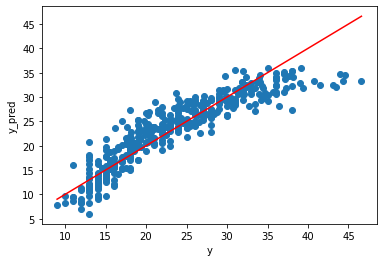

In [166]:
# 실측치y와 예측치y의 관계성 
# 전체 데이터

plt.scatter(y, y_pred)
line = np.linspace(min(y.values), max(y.values), 1000)
plt.plot(line, line, color = 'r')
plt.xlabel('y')
plt.ylabel('y_pred')
plt.show()

#### 모델 사용

In [179]:
import statsmodels.api as sm 

In [184]:
X1 = sm.add_constant(X)

In [185]:
# 예시1
reg = sm.OLS(y, X1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     249.4
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          1.37e-138
Time:                        12:05:09   Log-Likelihood:                -1025.4
No. Observations:                 392   AIC:                             2067.
Df Residuals:                     384   BIC:                             2099.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -12.8760      3.512     -3.666      0.000     -19.782      -5.970
cylinders        0.1610      0.248      0.649      0.516      -0.326       0.648
horsepower      -0.0056      0.013     -0.419      0.675      -0.032       0.021
weight          -0.0059      0.001     -9.704      0.000      -0.007      -0.005
acceleration     0.0488      0.099      0.494      0.622      -0.146       0.243
year             0.7593      0.052     14.585      0.000       0.657       0.862
USA             -5.7386      1.240     -4.626      0.000      -8.177      -3.300
EU              -3.7159      1.159     -3.207      0.001      -5.994      -1.438
JAPAN           -3.4214      1.237     -2.765      0.006      -5.854      -0.989
==============================================================================
Omnibus:                       29.159   Durbin-Watson:                   1.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.689
Skew:                           0.495   Prob(JB):                     4.41e-11
Kurtosis:                       4.393   Cond. No.                     6.22e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.72e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [182]:
import statsmodels.formula.api as smf

In [183]:
# 예시2
model = smf.ols(formula = 'mpg ~ cylinders + horsepower + weight + acceleration + year + USA + EU + JAPAN', data = data)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     249.4
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          1.37e-138
Time:                        12:03:23   Log-Likelihood:                -1025.4
No. Observations:                 392   AIC:                             2067.
Df Residuals:                     384   BIC:                             2099.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -12.8760      3.512     -3.666      0.000     -19.782      -5.970
cylinders        0.1610      0.248      0.649      0.516      -0.326       0.648
horsepower      -0.0056      0.013     -0.419      0.675      -0.032       0.021
weight          -0.0059      0.001     -9.704      0.000      -0.007      -0.005
acceleration     0.0488      0.099      0.494      0.622      -0.146       0.243
year             0.7593      0.052     14.585      0.000       0.657       0.862
USA             -5.7386      1.240     -4.626      0.000      -8.177      -3.300
EU              -3.7159      1.159     -3.207      0.001      -5.994      -1.438
JAPAN           -3.4214      1.237     -2.765      0.006      -5.854      -0.989
==============================================================================
Omnibus:                       29.159   Durbin-Watson:                   1.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.689
Skew:                           0.495   Prob(JB):                     4.41e-11
Kurtosis:                       4.393   Cond. No.                     6.22e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.72e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## 2. Regression Tree

### 2.1 train/test 분리

In [186]:
from sklearn.model_selection import train_test_split

In [196]:
y = data['mpg']
X = data.drop(['mpg', 'displacement'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
y_test.head()

146    28.0
282    22.3
69     12.0
378    38.0
331    33.8
Name: mpg, dtype: float64

In [197]:
X

cylinders  horsepower  weight  acceleration  year  USA  EU  JAPAN
0            8         130    3504          12.0    70    1   0      0
1            8         165    3693          11.5    70    1   0      0
2            8         150    3436          11.0    70    1   0      0
3            8         150    3433          12.0    70    1   0      0
4            8         140    3449          10.5    70    1   0      0
..         ...         ...     ...           ...   ...  ...  ..    ...
393          4          86    2790          15.6    82    1   0      0
394          4          52    2130          24.6    82    0   1      0
395          4          84    2295          11.6    82    1   0      0
396          4          79    2625          18.6    82    1   0      0
397          4          82    2720          19.4    82    1   0      0

[392 rows x 8 columns]

### 2.1 modeling

In [188]:
from sklearn.tree import DecisionTreeRegressor as dtr

In [200]:
rt = dtr(max_depth = 5)
rt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

### 2.2 시각화

In [201]:
from sklearn.externals.six import StringIO
import pydotplus
from sklearn import tree
from IPython.display import Image
import graphviz

In [202]:
col_names = ['cylinders', 'horsepower', 'weight', 'accerleration', 'year', 'USA', 'EU', 'JAPAN']

In [203]:
dot_file =StringIO()

tree.export_graphviz(rt, feature_names = col_names, out_file = dot_file, filled = True)

graph = pydotplus.graph_from_dot_data(dot_file.getvalue())

dot_file.getvalue() 

'digraph Tree {\nnode [shape=box, style="filled", color="black"] ;\n0 [label="cylinders <= 5.5\\nmse = 60.405\\nsamples = 313\\nvalue = 23.482", fillcolor="#f4ccaf"] ;\n1 [label="horsepower <= 70.5\\nmse = 32.679\\nsamples = 165\\nvalue = 29.088", fillcolor="#f0b78e"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="year <= 77.5\\nmse = 23.679\\nsamples = 56\\nvalue = 33.9", fillcolor="#eda673"] ;\n1 -> 2 ;\n3 [label="accerleration <= 20.0\\nmse = 10.117\\nsamples = 21\\nvalue = 30.119", fillcolor="#efb388"] ;\n2 -> 3 ;\n4 [label="weight <= 1846.0\\nmse = 4.282\\nsamples = 15\\nvalue = 31.467", fillcolor="#eeaf81"] ;\n3 -> 4 ;\n5 [label="mse = 3.688\\nsamples = 4\\nvalue = 33.75", fillcolor="#eda673"] ;\n4 -> 5 ;\n6 [label="mse = 1.913\\nsamples = 11\\nvalue = 30.636", fillcolor="#efb285"] ;\n4 -> 6 ;\n7 [label="horsepower <= 62.5\\nmse = 8.812\\nsamples = 6\\nvalue = 26.75", fillcolor="#f2c09c"] ;\n3 -> 7 ;\n8 [label="mse = 3.96\\nsamples = 5\\nvalue = 25.7"

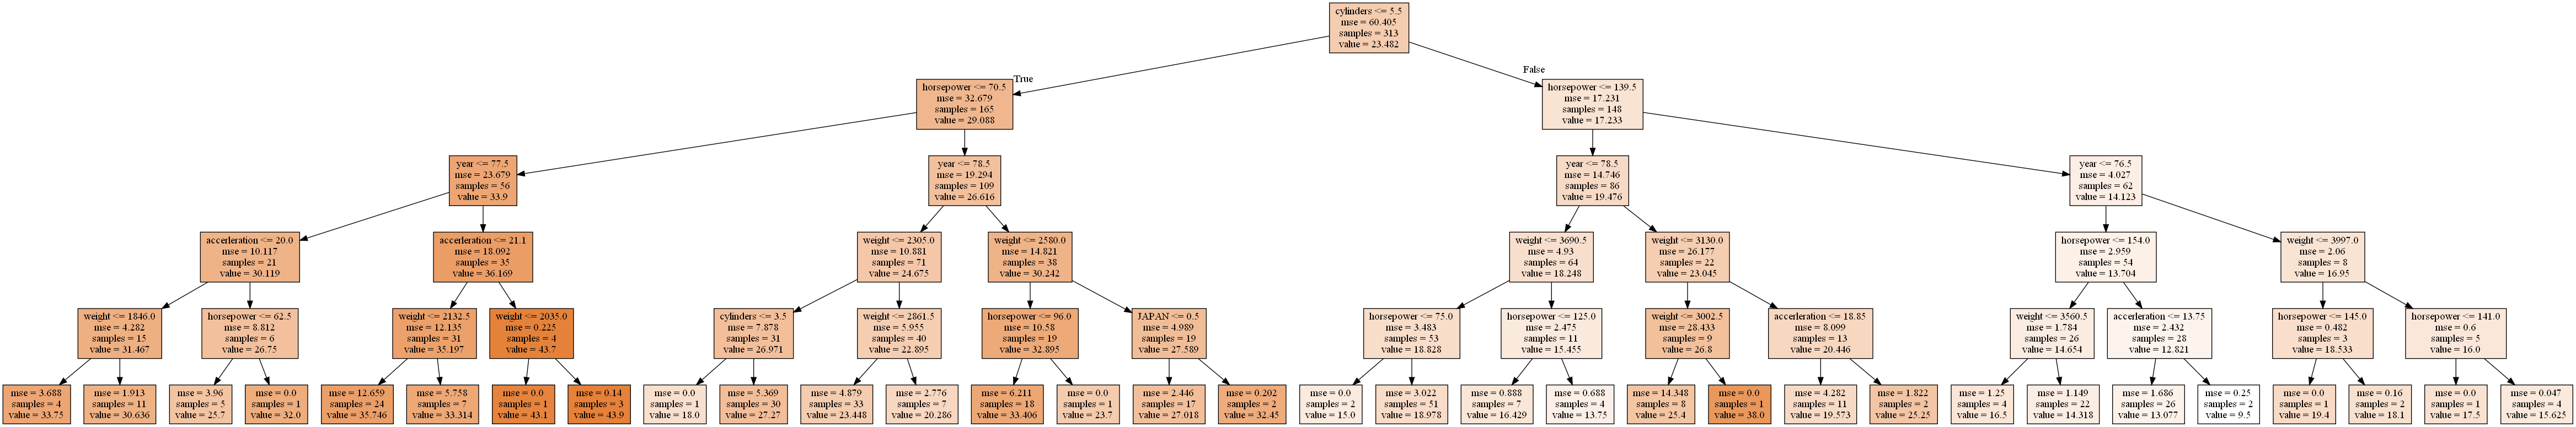

In [204]:
Image(graph.create_png())

### 2.4 파라미터 조정

In [205]:
# max_depth 100일때 overfitting 현상 #
reg_tree_h = dtr(max_depth=100, random_state=0)
reg_tree_h.fit(X_train,y_train) #criterion='mse'

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=100,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [206]:
print("훈련 세트 정확도: {:.3f}".format(reg_tree_h.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(reg_tree_h.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.725


In [208]:
# max_depth 5일때
reg_tree_f = dtr(max_depth = 5, random_state = 0)
reg_tree_f.fit(X_train,y_train) #criterion='mse'

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [209]:
print("훈련 세트 정확도: {:.3f}".format(reg_tree_f.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(reg_tree_f.score(X_test, y_test)))

훈련 세트 정확도: 0.931
테스트 세트 정확도: 0.757


In [158]:
# f print 
y_pred_f = reg_tree_f.predict(X_test)
print(f'{y_test}')
print(f'{y_pred_f}')

146    28.0
282    22.3
69     12.0
378    38.0
331    33.8
       ... 
101    23.0
65     14.0
56     26.0
262    19.2
216    31.5
Name: mpg, Length: 79, dtype: float64
[27.27       26.98636364 14.075      33.8        36.34761905 19.78064516
 36.34761905 33.8        18.5        27.27       24.875      14.075
 23.33714286 12.85714286 15.5        33.40555556 23.33714286 14.075
 27.27       26.98636364 16.33333333 16.5        23.33714286 26.98636364
 33.40555556 14.075      26.98636364 23.33714286 18.5        14.075
 23.33714286 26.98636364 23.33714286 30.68181818 18.5        26.98636364
 33.75       14.075      14.075      14.075      14.075      36.34761905
 33.40555556 14.075      27.27       14.075      33.40555556 12.85714286
 14.075      18.5        27.27       14.075      14.075      23.33714286
 33.40555556 26.98636364 19.78064516 19.78064516 33.75       27.27
 18.5        27.27       27.27       14.075      24.875      16.5
 14.075      30.63333333 23.33714286 36.34761905 36.347

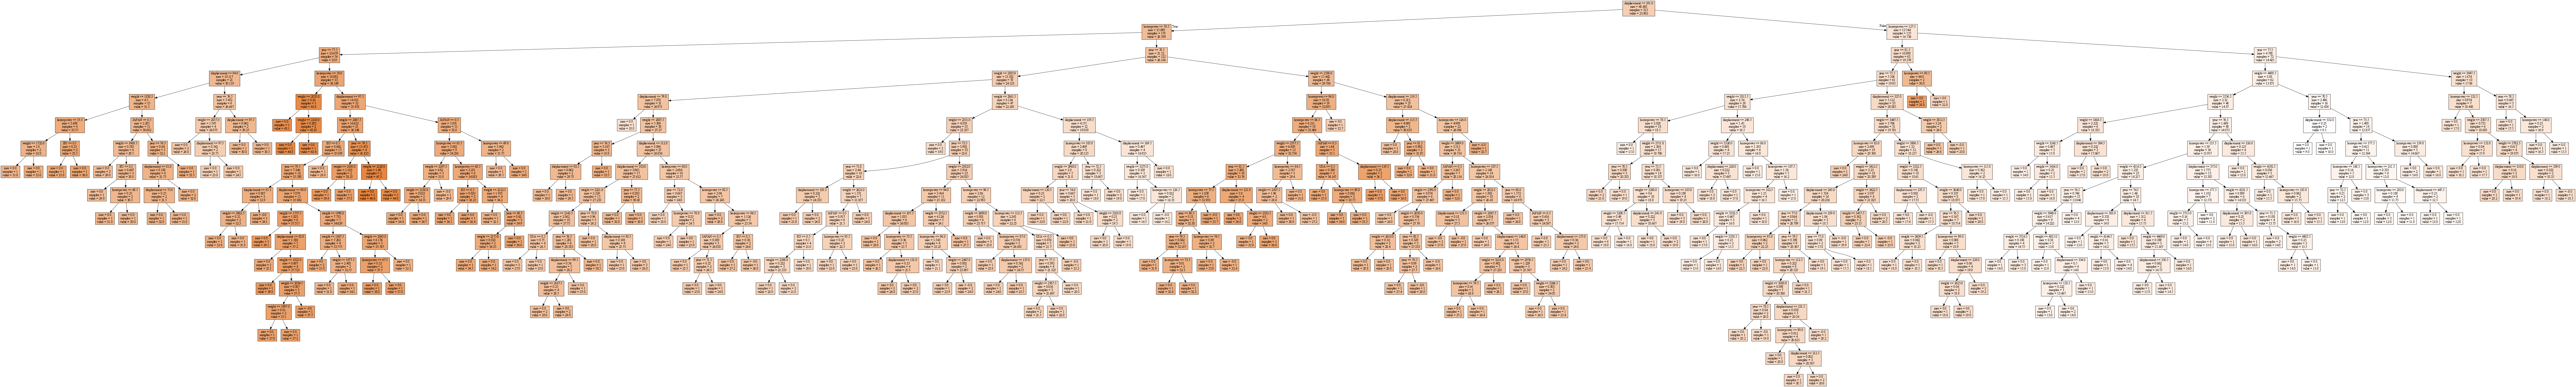

In [160]:
# max_depth 100일 때
dot_file =StringIO()

# tree.export_graphviz: reg_tree - 해당 model, feature_names - feature 이름, out_file - 어떤 
tree.export_graphviz(reg_tree_h, feature_names=col_names[1:], out_file = dot_file, filled =True)

graph=pydotplus.graph_from_dot_data(dot_file.getvalue())
graph.set_size('"100,100!"')

#dot 형식으로 데이터가 어떻게 들어가는지 볼 수 있음.
dot_file.getvalue()

# Depth = 100일 때
Image(graph.create_png()) #png 파일 생성하지 않고, ipython consle에 찍어 주는 것

In [162]:
# max_depth를 6로 주었을 때
dot_file =StringIO()

# tree.export_graphviz: reg_tree - 해당 model, feature_names - feature 이름, out_file - 어떤 
tree.export_graphviz(reg_tree_f, feature_names=col_names[1:], out_file = dot_file, filled =True)

graph=pydotplus.graph_from_dot_data(dot_file.getvalue())
graph.set_size('"100,100!"')

#dot 형식으로 데이터가 어떻게 들어가는지 볼 수 있음.
dot_file.getvalue() 

# Depth = 5일 때
Image(graph.create_png()) #png 파일 생성하지 않고, ipython consle에 찍어 주는 것

In [183]:
# max_depth: 1000, min_samples_split:30, min_samples_leaf:10로 설정시
# depth를 끝까지 내려도 설정해둔 값들 때문에 overfitting되는 것을 방지할 수 있음 
from sklearn.tree import DecisionTreeRegressor as dtr

# min_samples_split: 분기 시 최소한의 sample수를 충족해야 할 때 쓰임
# min_samples_leaf: 분기 후 node가 최소한의 sample수를 충족해야 할 때 쓰임

reg_tree_ad = dtr(max_depth = 5, min_samples_split = 20, min_samples_leaf = 10, random_state=0)
reg_tree_ad.fit(X_train, y_train) #criterion='mse'

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=20,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

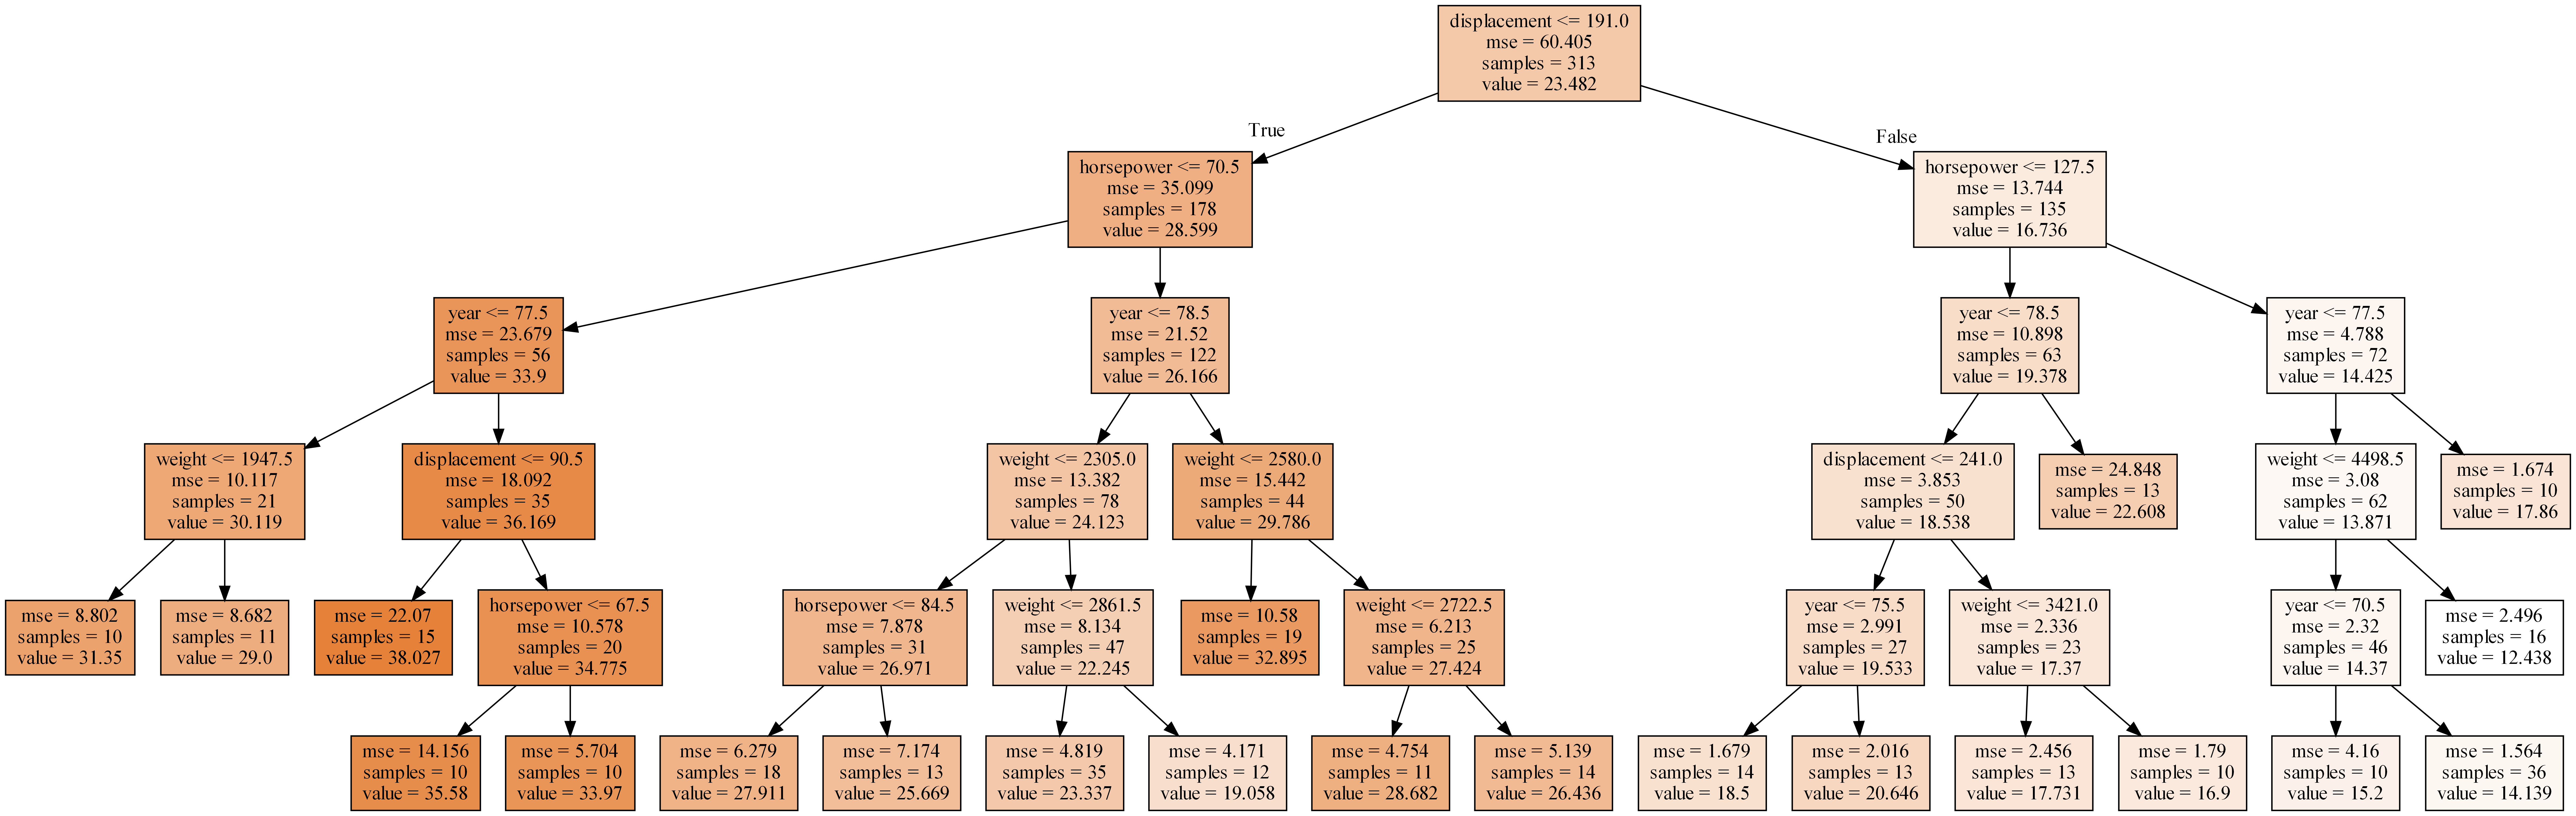

In [184]:
# max_depth와 min_samples_split, min_samples_leaf 조절했을 때 #
dot_file =StringIO()

# tree.export_graphviz: reg_tree - 해당 model, feature_names - feature 이름, out_file - 어떤 
tree.export_graphviz(reg_tree_ad, feature_names=col_names[1:], out_file = dot_file, filled =True)

graph=pydotplus.graph_from_dot_data(dot_file.getvalue())

graph.set_size('"100,100!"')

#dot 형식으로 데이터가 어떻게 들어가는지 볼 수 있음.
dot_file.getvalue() 

Image(graph.create_png())

In [185]:
# 성능측정 -> 오히려 성능이 조정했을 때보다 떨어지게 나올 수가 있음.
print("훈련 세트 정확도: {:.3f}".format(reg_tree_ad.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(reg_tree_ad.score(X_test, y_test)))

훈련 세트 정확도: 0.892
테스트 세트 정확도: 0.872


In [186]:
# tree를 만드는 결정에 각 특성이 얼마나 중요한지 평가
feature_imp = reg_tree_ad.feature_importances_
feature_imp

array([0.64937304, 0.18802098, 0.06001279, 0.10259319, 0.        ,
       0.        , 0.        ])

In [187]:
X_train

displacement  horsepower  weight  year  USA  EU  JAPAN
220          85.0          70    1945    77    0   0      1
256         225.0         100    3430    78    1   0      0
301         105.0          70    2200    79    1   0      0
193         200.0          81    3012    76    1   0      0
57          113.0          95    2278    72    0   0      1
..            ...         ...     ...   ...  ...  ..    ...
325          90.0          48    2085    80    0   1      0
194         232.0          90    3085    76    1   0      0
118         116.0          75    2158    73    0   1      0
48          250.0          88    3139    71    1   0      0
174         171.0          97    2984    75    1   0      0

[313 rows x 7 columns]

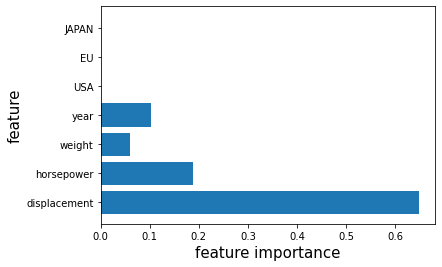

In [188]:
n_feature = X_train.shape[1]

idx = np.arange(n_feature)

plt.barh(idx, feature_imp, align='center')

plt.yticks(idx, col_names[1:])

plt.xlabel('feature importance', size=15)

plt.ylabel('feature', size=15)

plt.show()

## 3. Random Forest

### 3.1 modeling

In [189]:
from sklearn.ensemble import RandomForestRegressor

In [190]:
rfr = RandomForestRegressor(n_estimators = 100, oob_score = True, max_features=6,
                            criterion='mse', max_depth = 5, random_state = 42)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=42, verbose=0, warm_start=False)

### 3.2 feature importance

In [191]:
print(f'Random forest feature importances: {rfr.feature_importances_}')

Random forest feature importances: [0.29842426 0.16821681 0.4184686  0.10977579 0.00167962 0.00157758
 0.00185733]


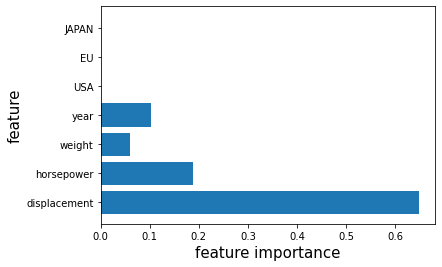

In [198]:
n_feature = X_train.shape[1]

idx = np.arange(n_feature)

plt.barh(idx, feature_imp, align='center')

plt.yticks(idx, col_names[1:])

plt.xlabel('feature importance', size=15)

plt.ylabel('feature', size=15)

plt.show()

### 3.2 성능 측정 & 시각화

In [199]:
# out of bag score
rfr.oob_score_

0.8592557565391986

In [200]:
print(rfr.score(X_test, y_test))

0.9036091854281352


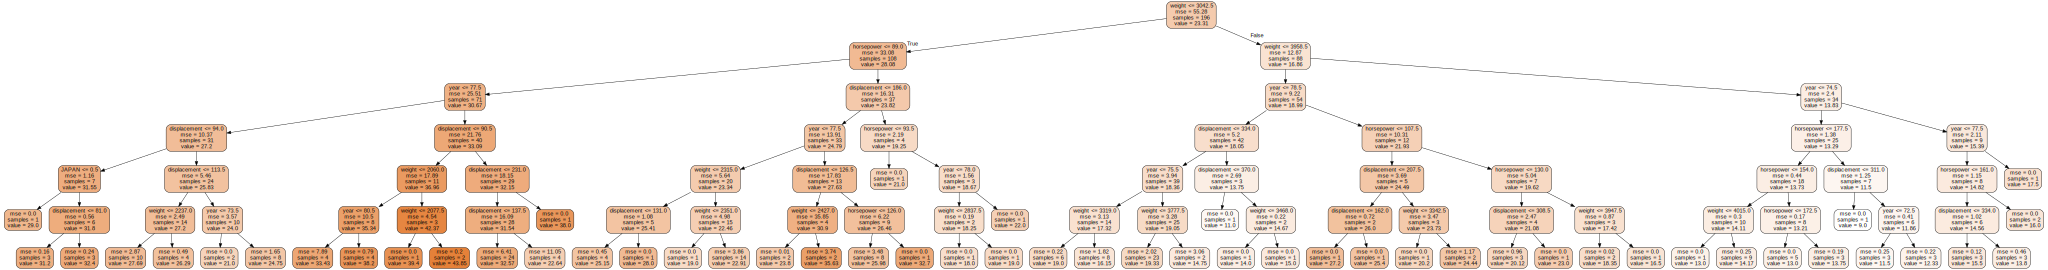

In [202]:
# randomforest 중 일부 트리 graph화
estimator = rfr.estimators_[50]

from sklearn import tree

# Export as dot file
dot_data = tree.export_graphviz(estimator, 
                feature_names = col_names[1:],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

graph = graphviz.Source(dot_data)  
graph

In [203]:
n_nodes = []
max_depths = []

for ind_tree in rfr.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)

In [204]:
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 102
Average maximum depth 6


In [205]:
# RandomForestRegressor 기준 #
from sklearn import metrics

y_pred = rfr.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.760011761080472
Mean Squared Error: 5.991201428688885
Root Mean Squared Error: 2.447693083025093


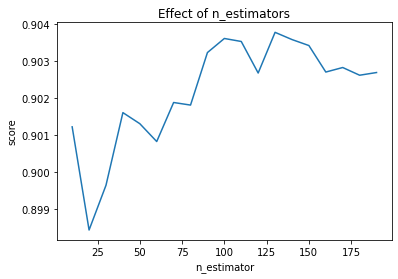

In [206]:
# random forest에 속한 decision tree별 성능변화
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    rfr.set_params(n_estimators=n)
    rfr.fit(X_train, y_train)
    scores.append(rfr.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

## 4. Gradient Boosting

### 4.1 scaling

In [208]:
# Feature Scaling # 각 feature의 평균을 0, 분산을 1로 변경, 모든 특성들이 같은 스케일을 갖게 됨.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# train data는 fit_transform 스케일링
X_train = sc.fit_transform(X_train)

# test data는 transform으로 스케일링
X_test = sc.transform(X_test)

### 4.2 modeling

In [209]:
from sklearn.ensemble import GradientBoostingRegressor

In [210]:
gbr_b = GradientBoostingRegressor(random_state=42, max_depth=5, min_samples_leaf = 2, n_estimators = 20)
gbr_b

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=20,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [211]:
gbr_b.fit(X_train, y_train)

print("Train R-squared: %.2f" %gbr_b.score(X_train, y_train) )
print("Test R-squared: %.2f" %gbr_b.score(X_test, y_test) )

Train R-squared: 0.95
Test R-squared: 0.89


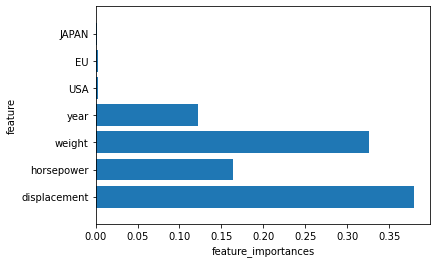

In [214]:
def plot_feature_importances(model):
    n_features = 7
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), col_names[1:])
    plt.xlabel("feature_importances")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)

plot_feature_importances(gbr_b)

### 4.3 파라미터 조정

In [215]:
from sklearn.model_selection import GridSearchCV

# n_estimators: tree 갯수, max_features: random feature 수, 
# max_depth: tree의 가지수, learning rate: train set에 overfitting 방지용

gbr = GradientBoostingRegressor(random_state=42)

param_grid = [{'n_estimators': range(1, 500, 50), 'max_features': range(1, 13),
              'max_depth': range(3, 5), 'learning_rate': np.linspace(0.1, 1, 10)}]

gsr = GridSearchCV(estimator=gbr, param_grid=param_grid,  cv=5, verbose=1, n_jobs=-1)

gsr.fit(X_train, y_train)

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1728 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 3992 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 7796 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done 11985 out of 12000 | elapsed:   52.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 12000 out of 12000 | elapsed:   52.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

In [216]:
# 모든 모델 중 가장 성능이 좋은 것을 뽑는 best estimator # n_estimators가 제일 높은 모델이 선정되는 것이 대부분
best_gsr_estimator = gsr.best_estimator_
best_gsr_estimator

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=3, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=51,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [217]:
gsr.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 3, 'n_estimators': 51}

In [218]:
print("Best Estimator Parameters" )
print("---------------------------" )
print("n_estimators: %d" %best_gsr_estimator.n_estimators )
print("max_depth: %d" %best_gsr_estimator.max_depth )
print("Learning Rate: %.1f" %best_gsr_estimator.learning_rate )
print("min_samples_leaf: %d" %best_gsr_estimator.min_samples_leaf )
print("max_features: %.1f" %best_gsr_estimator.max_features) 
print("---------------------------" )
print("Train R-squared: %.2f" %best_gsr_estimator.score(X_train,y_train) )
print("Test R-squared: %.2f" %best_gsr_estimator.score(X_test,y_test) )

Best Estimator Parameters
---------------------------
n_estimators: 51
max_depth: 3
Learning Rate: 0.1
min_samples_leaf: 1
max_features: 3.0
---------------------------
Train R-squared: 0.94
Test R-squared: 0.91


In [219]:
best_gsr_estimator.estimators_

array([[DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,
                      max_features=3, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=RandomState(MT19937) at 0x27D414B2840,
                      splitter='best')],
       [DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,
                      max_features=3, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=RandomState(MT19937) at 0x27D414B2840,
                      splitter='best')],
       [DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedm

In [220]:
best_gsr_estimator.feature_importances_

array([0.22207518, 0.16988927, 0.34537516, 0.21612192, 0.04401492,
       0.00117249, 0.00135106])

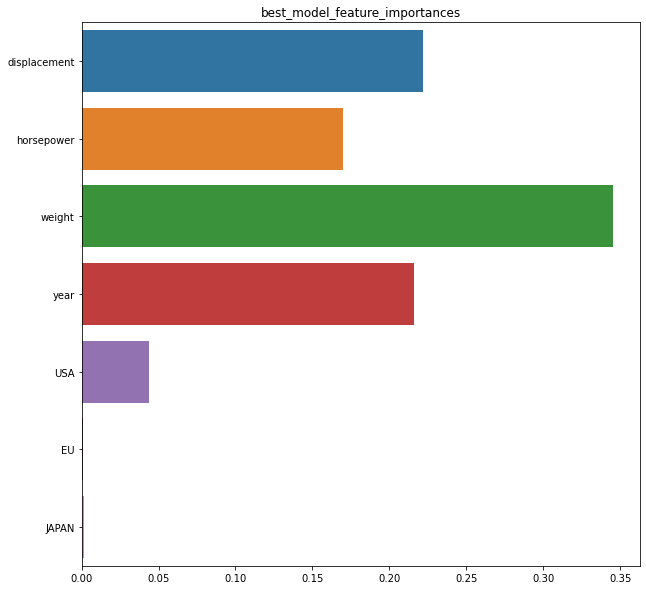

In [223]:
# feature_importances_: feature별 중요도를 수치로 표현 (총합:1)
## 결정에 각 특성이 얼마나 중요한지 평가하는 것
import seaborn as sns

ft_importances = pd.Series(best_gsr_estimator.feature_importances_, index = col_names[1:])

plt.figure(figsize=(10,10))
plt.title("best_model_feature_importances")
sns.barplot(x=ft_importances, y=col_names[1:])
plt.show()

In [224]:
# learning_curve: Determines cross-validated training and test scores for different training set sizes.
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)): 
    plt.figure() 
    plt.title(title) 
    if ylim is not None: 
        plt.ylim(*ylim) 
    plt.xlabel("Training examples") 
    plt.ylabel("Score") 
    train_sizes, train_scores, test_scores = learning_curve( estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes) 
    train_scores_mean = np.mean(train_scores, axis=1) 
    train_scores_std = np.std(train_scores, axis=1) 
    test_scores_mean = np.mean(test_scores, axis=1) 
    test_scores_std = np.std(test_scores, axis=1) 
    plt.grid() 
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r") 
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g") 
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score") 
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score") 
    plt.legend(loc="best") 
        
    return plt 

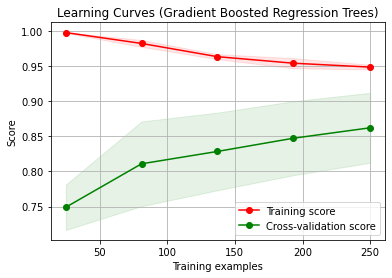

In [225]:
# train data의 size가 커지면 커질수록 train srcore와 valid score의 격차가 줄어듦 #
title = "Learning Curves (Gradient Boosted Regression Trees)"
estimator = GradientBoostingRegressor(n_estimators=best_gsr_estimator.n_estimators, 
                                      max_depth=best_gsr_estimator.max_depth, 
                                      learning_rate=best_gsr_estimator.learning_rate, 
                                      min_samples_leaf=best_gsr_estimator.min_samples_leaf, 
                                      max_features=best_gsr_estimator.max_features) 
# estimator: bset estimator
plot_learning_curve(estimator, title, X_train, y_train, cv=5, n_jobs=-1) 
plt.show()

In [226]:
best_gsr_estimator.estimators_

array([[DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,
                      max_features=3, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=RandomState(MT19937) at 0x27D414B2840,
                      splitter='best')],
       [DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,
                      max_features=3, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=RandomState(MT19937) at 0x27D414B2840,
                      splitter='best')],
       [DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedm

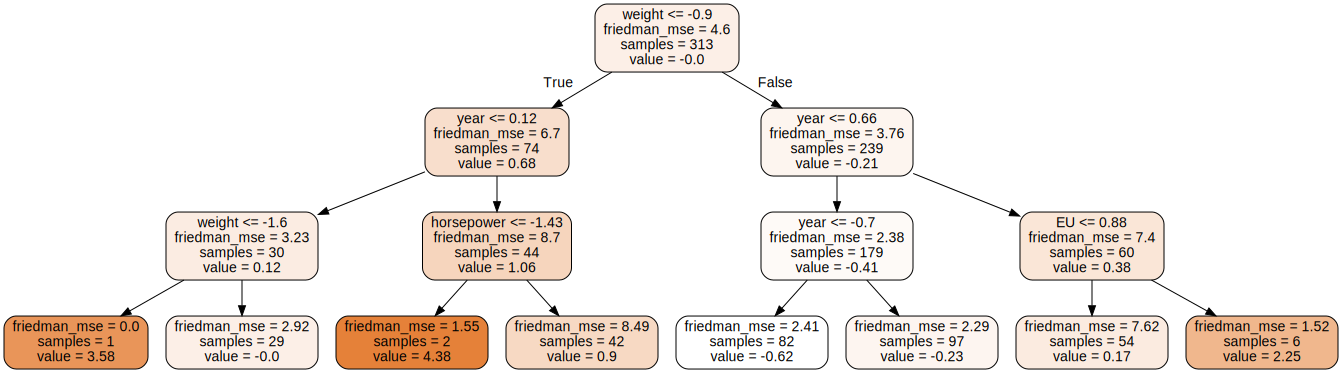

In [230]:
# best gradient boosting 중 일부 트리 graph화 # value: 잔차
estimator = best_gsr_estimator.estimators_[30][0]

import graphviz
from sklearn import tree

# Export as dot file
dot_data = tree.export_graphviz(estimator, 
                feature_names = col_names[1:],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

graph = graphviz.Source(dot_data)  
graph